In [1]:
import torch
import tensorflow
from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torchvision.transforms as T
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.10.0'

In [2]:
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

In [4]:
import pandas as pd
from PIL import Image
import numpy as np

In [5]:
a = pd.read_csv('10. MOTHS IMAGE DATASET-CLASSIFICATION\MOTHS.csv')

In [42]:
transforms = T.Compose([
    T.ToPILImage(),
    T.Resize(size = (112,112)),
    T.PILToTensor()
])

transforms_same = T.Compose([
    # T.Resize(size = (112,112)),
    T.PILToTensor()
])


transforms_gray = T.Compose([
    T.Grayscale(num_output_channels=1),
    T.PILToTensor()
])

In [74]:
ctr = 0
X_train = []
Y_train = []
X_test = []
Y_test = []

for i in a.values:
    im = Image.open('10. MOTHS IMAGE DATASET-CLASSIFICATION\\'+i[1])
    temp_gray = transforms_gray(im)
    pix = np.int_(np.array(temp_gray))
    input_shape = pix.shape
    new_shape = input_shape[1], input_shape[0]
    result = skimage.filters.prewitt(pix)
    ans = np.array(np.float64(transforms_same(im)))
    for j in range(3):
        ans[j]=np.sqrt(ans[j]*ans[j]+result[0]*result[0])
        # ans[j]=(ans[j]/2+result[0]/2)
    ans = np.int_(np.transpose(np.array(transforms(torch.tensor(ans)))))
    # X_train.append(ans)
    
    #ans = transforms(im)
    if i[3]=='train':
        X_train.append(ans)
        Y_train.append(i[0])
    elif i[3]=='test':
        X_test.append(ans)
        Y_test.append(i[0])
    ctr+=1
    if ctr%100==0:
        print(ctr)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


In [65]:
X_train[0].shape

(112, 112, 3)

In [13]:
np.array([[1,2,3],[1,2,3],[1,2,3]])*(1/np.array([[1,2,3],[1,2,3],[1,2,3]]))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [29]:
np.transpose(X_train[0]).shape

(3, 112, 112)

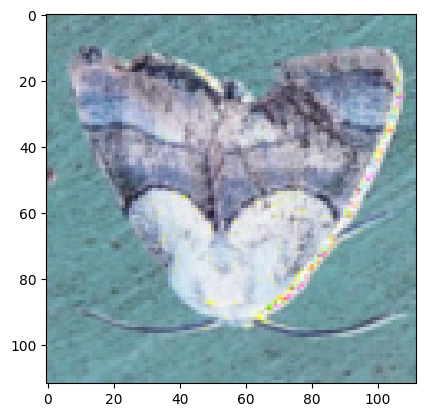

In [76]:
plt.imshow((np.int_(X_train[123])))


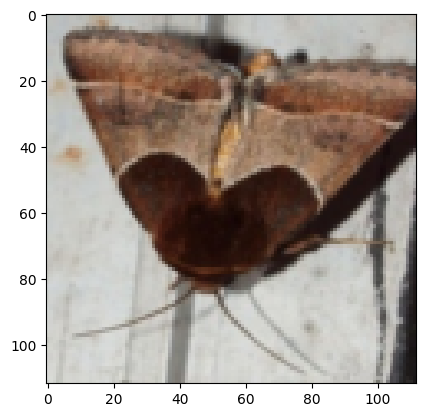

In [22]:
plt.imshow(pix)

In [30]:
X_train[0]

array([[[188, 189, 189, ..., 216, 216, 211],
        [187, 189, 190, ..., 216, 217, 215],
        [185, 188, 190, ..., 214, 212, 208],
        ...,
        [187, 186, 185, ...,  29,  39,  45],
        [188, 188, 185, ...,  29,  33,  43],
        [183, 186, 180, ...,  27,  24,  28]],

       [[192, 193, 193, ..., 216, 218, 213],
        [191, 191, 192, ..., 217, 219, 217],
        [190, 190, 190, ..., 215, 214, 210],
        ...,
        [186, 185, 183, ...,  25,  35,  41],
        [185, 185, 181, ...,  25,  29,  41],
        [179, 181, 176, ...,  24,  22,  26]],

       [[191, 191, 190, ..., 214, 215, 210],
        [188, 188, 189, ..., 212, 214, 212],
        [187, 188, 189, ..., 210, 209, 205],
        ...,
        [181, 179, 177, ...,  24,  34,  40],
        [180, 179, 175, ...,  25,  28,  40],
        [174, 175, 169, ...,  25,  23,  27]]])

In [50]:
pix = np.transpose(np.float(X_train[0]))

IndexError: list index out of range

In [26]:
pix.shape

(112, 112, 3)

In [42]:
X_train= np.array(X_train)

C:\Users\k_dys\AppData\Local\Temp\ipykernel_8204\2519030136.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X_train= np.array(X_train)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7183,) + inhomogeneous part.

In [19]:
s.shape

NameError: name 's' is not defined

In [26]:

pix = np.array(PIL.Image.open('001.jpg'))

(224, 224, 3)


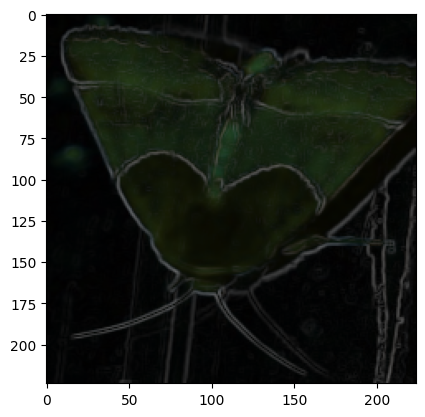

In [54]:
pix = np.uint8(np.transpose(X_train[0]))
input_shape = pix.shape
print(input_shape)
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')

In [44]:
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(torch.stack(X_train, dim = 0)).float(), torch.Tensor(Y_train).float())
test_dataset = torch.utils.data.TensorDataset(torch.Tensor(torch.stack(X_test, dim = 0)).float(), torch.Tensor(Y_test).float())

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [33]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
 
    for i in range (len(dataset)):
        x_.append(torch.transpose(dataset[i][:][0],0,2))
        y_.append(dataset[i][:][1])
      

    return x_, y_  

In [34]:
x_train, y_train = split_to_x_y(train_dataset)
x_test, y_test =  split_to_x_y(test_dataset)

In [10]:
Xtrain = np.array(x_train)
Ytrain = np.array(y_train)

Xtest = np.array(x_test)
Ytest = np.array(y_test)

Ytrain = keras.utils.to_categorical(Ytrain, 50) #10 классов 
Ytest = keras.utils.to_categorical(Ytest, 50)

NameError: name 'x_train' is not defined

In [77]:
Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

Xtest = np.array(X_test)
Ytest = np.array(Y_test)

Ytrain = keras.utils.to_categorical(Ytrain, 50) #10 классов 
Ytest = keras.utils.to_categorical(Ytest, 50)

In [78]:
Xtrain.shape[:]

(7183, 112, 112, 3)

In [79]:
input_shape = Xtrain.shape[1:]
input_shape

(112, 112, 3)

In [80]:
# архитектура игрушечной ResNet
inputs = keras.Input(shape=(112, 112, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(50, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [81]:
print("Num GPUs Available: ",
      len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [82]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)
print(model.evaluate(Xtest, Ytest))

Epoch 1/20
113/113 [==============================] - 10s 67ms/step - loss: 4.8539 - accuracy: 0.0239
Epoch 2/20
113/113 [==============================] - 7s 63ms/step - loss: 3.9025 - accuracy: 0.0287
Epoch 3/20
113/113 [==============================] - 7s 63ms/step - loss: 3.8655 - accuracy: 0.0373
Epoch 4/20
113/113 [==============================] - 7s 63ms/step - loss: 3.7483 - accuracy: 0.0542
Epoch 5/20
113/113 [==============================] - 7s 63ms/step - loss: 3.6189 - accuracy: 0.0767
Epoch 6/20
113/113 [==============================] - 7s 64ms/step - loss: 3.4189 - accuracy: 0.1108
Epoch 7/20
113/113 [==============================] - 7s 62ms/step - loss: 3.1599 - accuracy: 0.1587
Epoch 8/20
113/113 [==============================] - 7s 62ms/step - loss: 2.8892 - accuracy: 0.2136
Epoch 9/20
113/113 [==============================] - 7s 62ms/step - loss: 2.5833 - accuracy: 0.2724
Epoch 10/20
113/113 [==============================] - 7s 62ms/step - loss: 2.3700 - accur

In [15]:
#Identity block

def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [17]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [18]:
def ResNet50(input_shape= input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [19]:
base_model = ResNet50()

In [20]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(50,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [21]:
model = keras.Model(inputs=base_model.input, outputs=headModel)

In [22]:
from keras.optimizers import SGD, Adam

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [83]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('/saved_models/best_model.h5', monitor='val_accuracy', 
                    save_best_only=True,
                    save_weights_only=False,
                    mode="auto",
                    save_freq="epoch",
                    initial_value_threshold=None,
)

In [25]:
H = model.fit(Xtrain, Ytrain, 
              batch_size = 32, 
              epochs = 20, 
              validation_data =(Xtest, Ytest), 
              shuffle = True, 
            #   callbacks = [mc,es]
              ) 
# Score trained model. 
scores = model.evaluate(Xtest, Ytest, verbose = 1) 
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])


Epoch 1/20
225/225 [==============================] - 27s 120ms/step - loss: 2.4042 - accuracy: 0.3088 - val_loss: 5.5937 - val_accuracy: 0.0840
Epoch 2/20
225/225 [==============================] - 27s 121ms/step - loss: 2.2079 - accuracy: 0.3556 - val_loss: 4.6671 - val_accuracy: 0.1160
Epoch 3/20
225/225 [==============================] - 27s 121ms/step - loss: 2.3386 - accuracy: 0.3315 - val_loss: 4.3133 - val_accuracy: 0.0920
Epoch 4/20
225/225 [==============================] - 27s 121ms/step - loss: 2.3195 - accuracy: 0.3336 - val_loss: 3.9188 - val_accuracy: 0.1280
Epoch 5/20
225/225 [==============================] - 27s 121ms/step - loss: 2.1764 - accuracy: 0.3767 - val_loss: 6.6491 - val_accuracy: 0.0320
Epoch 6/20
225/225 [==============================] - 27s 121ms/step - loss: 2.0465 - accuracy: 0.4086 - val_loss: 2.9637 - val_accuracy: 0.2680
Epoch 7/20
225/225 [==============================] - 27s 121ms/step - loss: 1.7808 - accuracy: 0.4725 - val_loss: 4.1854 - val_ac